<h1 align="center"  style=" color:#fff; background-color:#228b22; padding:10px;">Group G </h1>
<table >
<tr><th >Student Id <th><th> Name <th><th >Student Email <th><th> Contribution <th><th>In Percentage</th><tr>
<tr><td> 0283599 <td><td>  Krina Patel<td><td> cbu22cgxl@cbu.ca <td><td> Data understanding and cleaning<td><td>33%<td><tr>
<tr><td> 0269627 <td><td>Amara Okonkwo <td><td> Cbu22bdqd@cbu.ca <td><td> Normalization and Correlation <td><td>33%<td><tr>
<tr><td> 0285168  <td><td> Simarpreet Kaur <td><td> CBU22CLBN@cbu.ca <td><td> Visualization, Model Implementation, Model Comparison, Error Handling and Project Formatting <td><td>34%<td><tr>
<table>

# Video Game Sale Prediction

## Dataset 
### The data is taken from: https://www.kaggle.com/datasets/gregorut/videogamesales

## Dataset Understanding 
The gaming industry is certainly one of the thriving industries of the modern age and one of those that are most influenced by the advancement in technology. With the availability of technologies like AR/VR in consumer products like gaming consoles and even smartphones, the gaming sector shows great potential. In this hackathon, we use our analytical skills to predict the sales of video games depending on given factors. Given are 8 distinguishing factors that can influence the sales of a video game. Our objective as a data scientist is to build a machine learning model that can accurately predict the sales in millions of units for a game.

* Rank –  This column seems to indicate the ranking of the video game in some context. It might represent the position of the game in a particular list or ranking based on certain criteria.
* Name – The name of the video game. Each row represents a specific game, and this column holds the title of that game.
*  Platform -  Refers to the gaming platform or console on which the game is available or intended to be played, such as PlayStation, Xbox, PC, etc
*  Year - Represents the year when the game was released.
*  Genre -Indicates the category or type of the video game, such as action, adventure, sports, role-playing, etc.
*  Publisher - The company or entity responsible for publishing or releasing the game.
*  NA_Sales -Sales figures in North America
*  EU_Sales -Sales figures in Europe
*  JP_SALE  -Sales figures in Japan
*  Other_sales -Sales figures in other regions
*  Global_sales-Total sales figures worldwide, which might be the sum of sales from different regions.

## Problem Statement

* Find the trends for the sales of games? 
* Find the correlation among the variables ?
* Predict the Global sales for game on the basis of regional sales ?

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import zscore

## Loading a CSV file

In [148]:
# Viewing the data
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Dataset Structure

In [149]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [150]:
# checking random 10 records
df.sample(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1261,1263,Sonic CD,SCD,1993.0,Platform,Sega,1.00,0.36,0.09,0.05,1.50
9806,9808,Gallop Racer 2000,PS,2000.0,Sports,Tecmo Koei,0.00,0.00,0.11,0.01,0.12
14359,14362,PriPara & Pretty Rhythm: PriPara de Tsukaeru O...,3DS,2015.0,Action,Namco Bandai Games,0.00,0.00,0.03,0.00,0.03
2658,2660,DJ Hero,Wii,2009.0,Misc,Activision,0.47,0.23,0.00,0.07,0.77
4767,4769,Jikkyou Powerful Pro Yakuu '94,SNES,1994.0,Sports,Konami Digital Entertainment,0.00,0.00,0.41,0.00,0.41
356,357,Luigi's Mansion,GC,2001.0,Action,Nintendo,2.38,0.67,0.46,0.10,3.60
5530,5532,My Baby: First Steps,DS,2009.0,Simulation,SouthPeak Games,0.28,0.03,0.00,0.02,0.33
2482,2484,Dynasty Warriors 2,PS2,2000.0,Action,THQ,0.24,0.19,0.34,0.06,0.83
3513,3515,Tales of the Abyss,PS2,2005.0,Role-Playing,Namco Bandai Games,0.00,0.00,0.57,0.00,0.57
12539,12541,Toriko: Gourmet Battle!,3DS,2013.0,Role-Playing,Namco Bandai Games,0.00,0.00,0.06,0.00,0.06


In [151]:
df.shape

(16598, 11)

## List of columns and fields

In [152]:
list(df)

['Rank',
 'Name',
 'Platform',
 'Year',
 'Genre',
 'Publisher',
 'NA_Sales',
 'EU_Sales',
 'JP_Sales',
 'Other_Sales',
 'Global_Sales']

In [153]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

# Data Exploration

### Review the summary of dataset

In [154]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


## Data Cleaning

<div class="alert alert-block alert-info" style="font-size:16px;  line-height:1.6;">
Data cleaning refers to the process of identifying and rectifying errors, inconsistencies, and inaccuracies within a dataset to ensure its accuracy, completeness, and reliability for analysis or modeling purposes. It involves various techniques and procedures to preprocess raw data, making it suitable for further exploration, analysis, or machine learning. 
</div>

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


<div class="alert alert-block alert-info" style="font-size:16px;  line-height:1.6;">
In the dataset, we have 6 float 1 integer and 4 object. The target variable 'Global_Sales' is float.
</div>

In [156]:
df.shape

(16598, 11)

<div class="alert alert-block alert-warning">
Year should be int but it is showing float
</div>

In [157]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

<div class="alert alert-block alert-info" style="font-size:16px;  line-height:1.6;">
Here we're checking which columns has null value and how many missing values exist in each column, which is crucial during the data cleaning and preprocessing phase.
</div>

In [158]:
df.Year.unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2003., 1986., 2000.,   nan, 1995., 2016., 1991., 1981., 1987.,
       1980., 1983., 2020., 2017.])

<div class="alert alert-block alert-danger">
    Year is containing null values i.e. nan which need to be removed.
</div>

In [159]:
# drop function to remove null value
df = df.dropna()
df.Year.unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2003., 1986., 2000., 1995., 2016., 1991., 1981., 1987., 1980.,
       1983., 2020., 2017.])

<div class="alert alert-block alert-info">
By using dropna() function we are able to clean data which rows having the value not available. As we can see that in year columns we have value equal to nan but when we run dropna() function then it will remove null values.
</div>

<div class="alert alert-block alert-warning">
Year variable should be integer type not float. Therefore, need to convert into integer.
</div>

In [160]:
# Covert the datatype of 'Year' to int
df['Year'] = df['Year'].astype('int64')

C:\Users\simar\AppData\Local\Temp\ipykernel_8900\2891863982.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Year'].astype('int64')


In [161]:
print(df.dtypes)

Rank              int64
Name             object
Platform         object
Year              int64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object


In [162]:
df.shape

(16291, 11)

In [163]:
# Checking the duplicate of this dataset 
df.duplicated().value_counts()

False    16291
Name: count, dtype: int64

<div class="alert alert-block alert-info" style="font-size:16px;  line-height:1.6;">
 After cleaning the data we checked the shape of the data  which came down to 16291 before then it was 16598. and aslo checked if there is still duplicate values our data the false here show there is no duplicate values in our data.
 By cleaning the data we removed all the null values and converted those variables that needs to be converted.
</div>

## Data Visualization 


Total Sales by Region - North America, Europe, Japan, Other

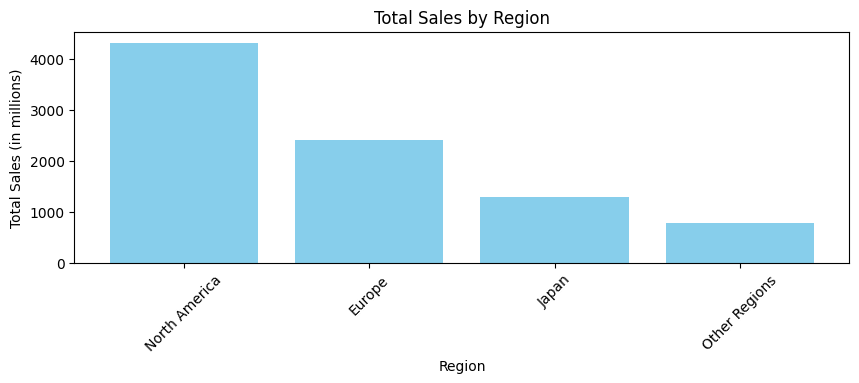

In [164]:
region_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
total_sales = region_sales.sum()
name = {'NA_Sales' : 'North America',
        'EU_Sales' : 'Europe',
        'JP_Sales' : 'Japan',
        'Other_Sales' : 'Other Regions'}

plt.figure(figsize=(10, 3))
plt.bar(name.values(), total_sales.values, color='skyblue')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45)

plt.show()

<div class="alert alert-block alert-info" style="font-size:16px;  line-height:1.6;">
The above bar plot compares the total sales of video games in different regions (North America, Europe, Japan, Other Regions). North America has a higher sales followed by Europian country.
</div>

Number of games released over the years

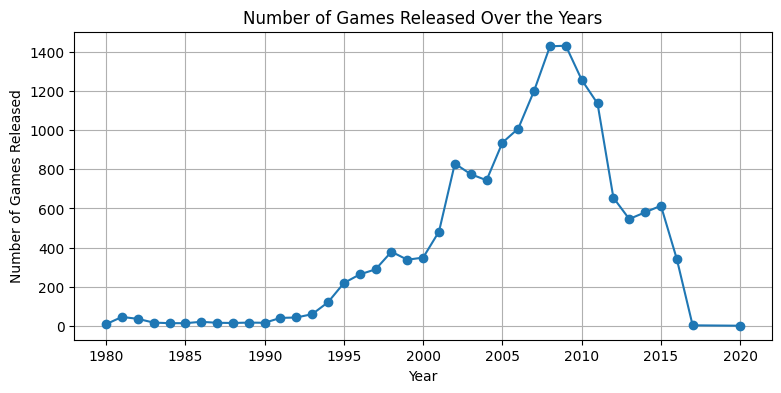

In [165]:
game_count = df.groupby('Year')['Name'].count().reset_index()
plt.figure(figsize=(9, 4))
plt.plot(game_count['Year'], game_count['Name'], marker='o', linestyle='-')
plt.title('Number of Games Released Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Games Released')
plt.grid(True)
plt.show()

<div class="alert alert-block alert-info" style="font-size:16px;  line-height:1.6;">
The above line graph show the trend of game releases over time, showcasing how the number of games released varies across different years, allowing for an understanding of the gaming industry's evolution in terms of yearly game production.More games were relased in 2009

</div>

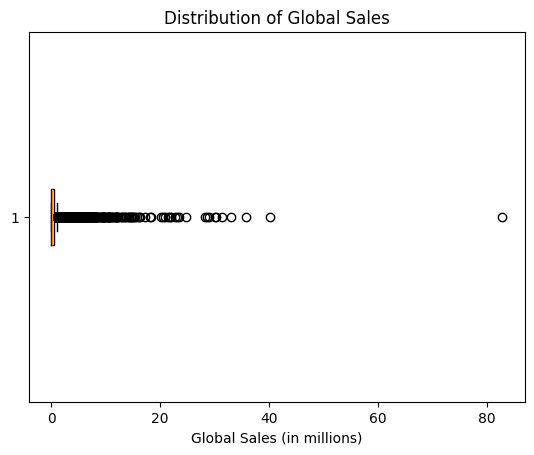

In [166]:
# boxplot
plt.boxplot(df['Global_Sales'], vert=False)
plt.xlabel('Global Sales (in millions)')
plt.title('Distribution of Global Sales')
plt.show()

<div class="alert alert-block alert-info" style="font-size:16px;  line-height:1.6;">
A boxplot is a visual representation that summarizes the distribution of a numerical dataset. It shows several statistical measures, including the minimum, first quartile (Q1), median (second quartile, Q2), third quartile (Q3), maximum, and any outliers present in the data.

In this case, the boxplot shows the distribution of global sales of video games, providing insights into the central tendency, spread, and presence of outliers within the sales data. The horizontal orientation allows for an easy understanding of the sales distribution and potential outliers in the dataset. Here we can see an outlier
</div>

Highest Sales of games released on different Platform

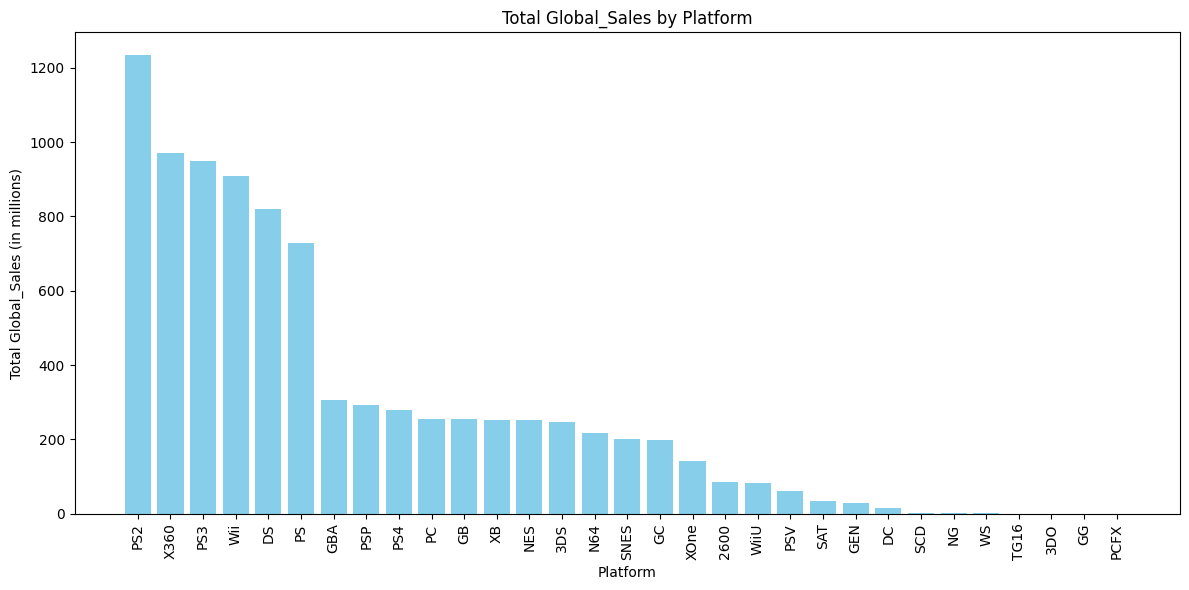

In [167]:

platform_sales = df.groupby('Platform')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()

plt.figure(figsize=(12, 6))

region = 'Global_Sales'

sorted_data = platform_sales.sort_values(by=region, ascending=False)


plt.bar(sorted_data.index, sorted_data[region], color='skyblue')
plt.xlabel('Platform')
plt.ylabel(f'Total {region} (in millions)')
plt.title(f'Total {region} by Platform')

plt.xticks(rotation=90)

plt.tight_layout()

plt.show()


<div class="alert alert-block alert-info" style="font-size:16px;  line-height:1.6;">
The above the bar plot shows the total global sales of video games across different gaming platforms, allowing comparison of sales performance among platforms. here we can see that PS2 is leading Globally followed by X360 AND PS3
</div>

C:\Users\simar\AppData\Local\Temp\ipykernel_8900\2580013663.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=top_platforms, x='Year', y='Global_Sales', hue='Platform', ci=None)


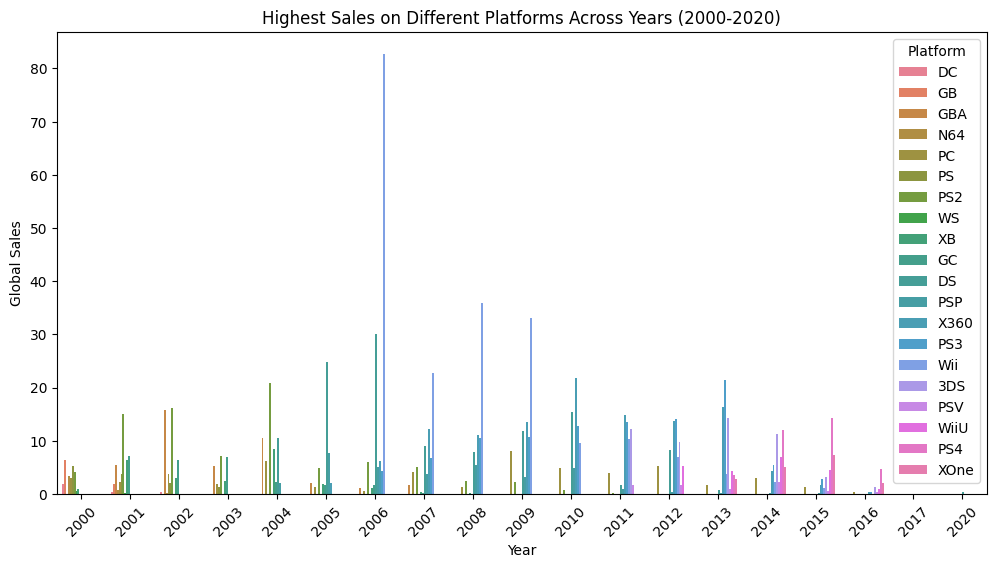

In [168]:

filtered_data = df[(df['Year'] >= 2000) & (df['Year'] <= 2020)]

platform_max_sales = filtered_data.groupby(['Year', 'Platform'])['Global_Sales'].idxmax()

top_platforms = filtered_data.loc[platform_max_sales][['Year', 'Platform', 'Global_Sales']]

plt.figure(figsize=(12, 6))
sns.barplot(data=top_platforms, x='Year', y='Global_Sales', hue='Platform', ci=None)
plt.title('Highest Sales on Different Platforms Across Years (2000-2020)')
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-block alert-info" style="font-size:16px;  line-height:1.6;">

 This shows the highest sales achieved by different gaming platforms in each year between 2000 and 2020, allowing comparison of platform performance over time. here it shows that in 2006 Wii has the higest sales globally with over 80 sales, and in 2008 it sold about 35.

</div>

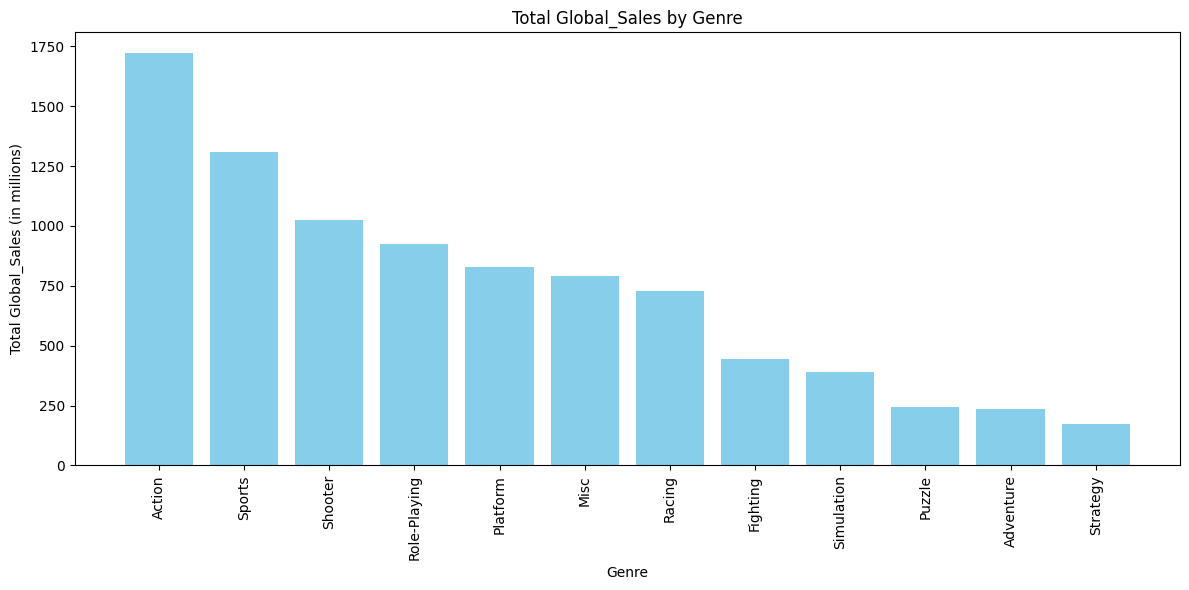

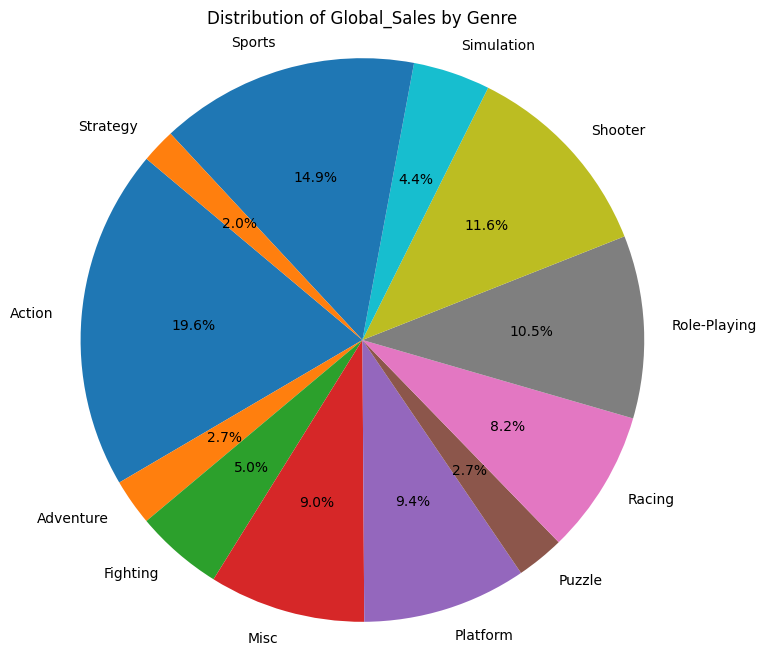

In [169]:
genre_sales = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()

plt.figure(figsize=(12, 6))

region = 'Global_Sales'

sorted_data = genre_sales.sort_values(by=region, ascending=False)

plt.bar(sorted_data.index, sorted_data[region], color='skyblue')
plt.xlabel('Genre')
plt.ylabel(f'Total {region} (in millions)')
plt.title(f'Total {region} by Genre')

plt.xticks(rotation=90)

plt.tight_layout()

plt.show()


#Pie chart

plt.figure(figsize=(8, 8))

region = 'Global_Sales'

total_sales = genre_sales[region].sum()

genre_sales['Percentage'] = (genre_sales[region] / total_sales) * 100

plt.pie(genre_sales['Percentage'], labels=genre_sales.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')

plt.title(f'Distribution of {region} by Genre')

plt.show()

<div class="alert alert-block alert-info" style="font-size:16px;  line-height:1.6;">
The bar plot visualizes the total global sales for each video game genre, allowing comparison of sales figures among different genres.here it shows that Action sales more than other genre
The pie chart shows the percentage distribution of global sales across various genres, providing an overview of the contribution of each genre to the total sales. we can see that Action has a higer percentage of 19.6% while adventure and puzzle has a lower perecntage of 2.7%  
These visualizations offer insights into both the overall sales performance of genres and the proportional contribution of each genre to the total global sales of video games.
</div>

Histogram and PairPlot in Data Frames

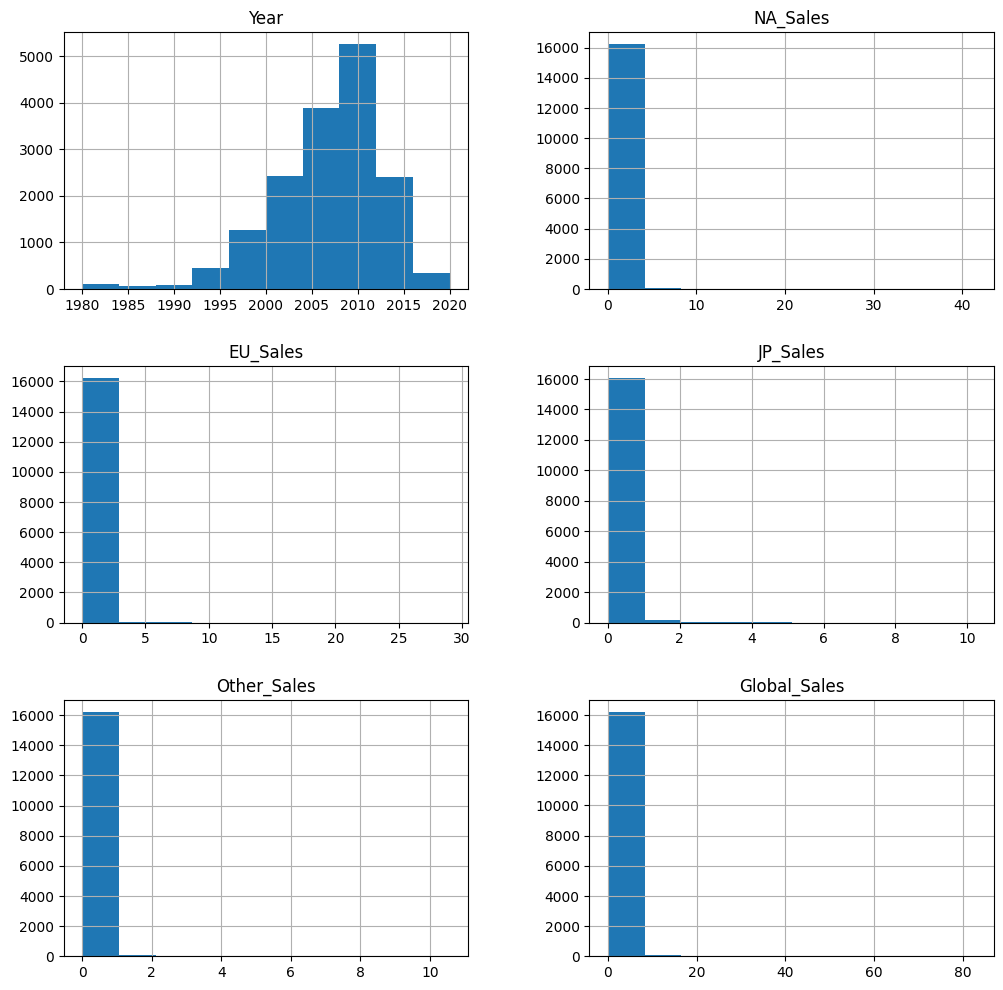

In [170]:
a = ['Year','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']
df[a].hist(figsize = (12,12))
plt.show()

<div class="alert alert-block alert-info" style="font-size:16px;  line-height:1.6;">
These histograms shows the distribution patterns of sales figures in different regions and the distribution of game releases across various years. They help in understanding the spread and frequency distribution of numerical data within each specified column. Here we can see that the game had a higher sales in the year 2010 while in the year 1985 it sold it didn't sell much
</div>

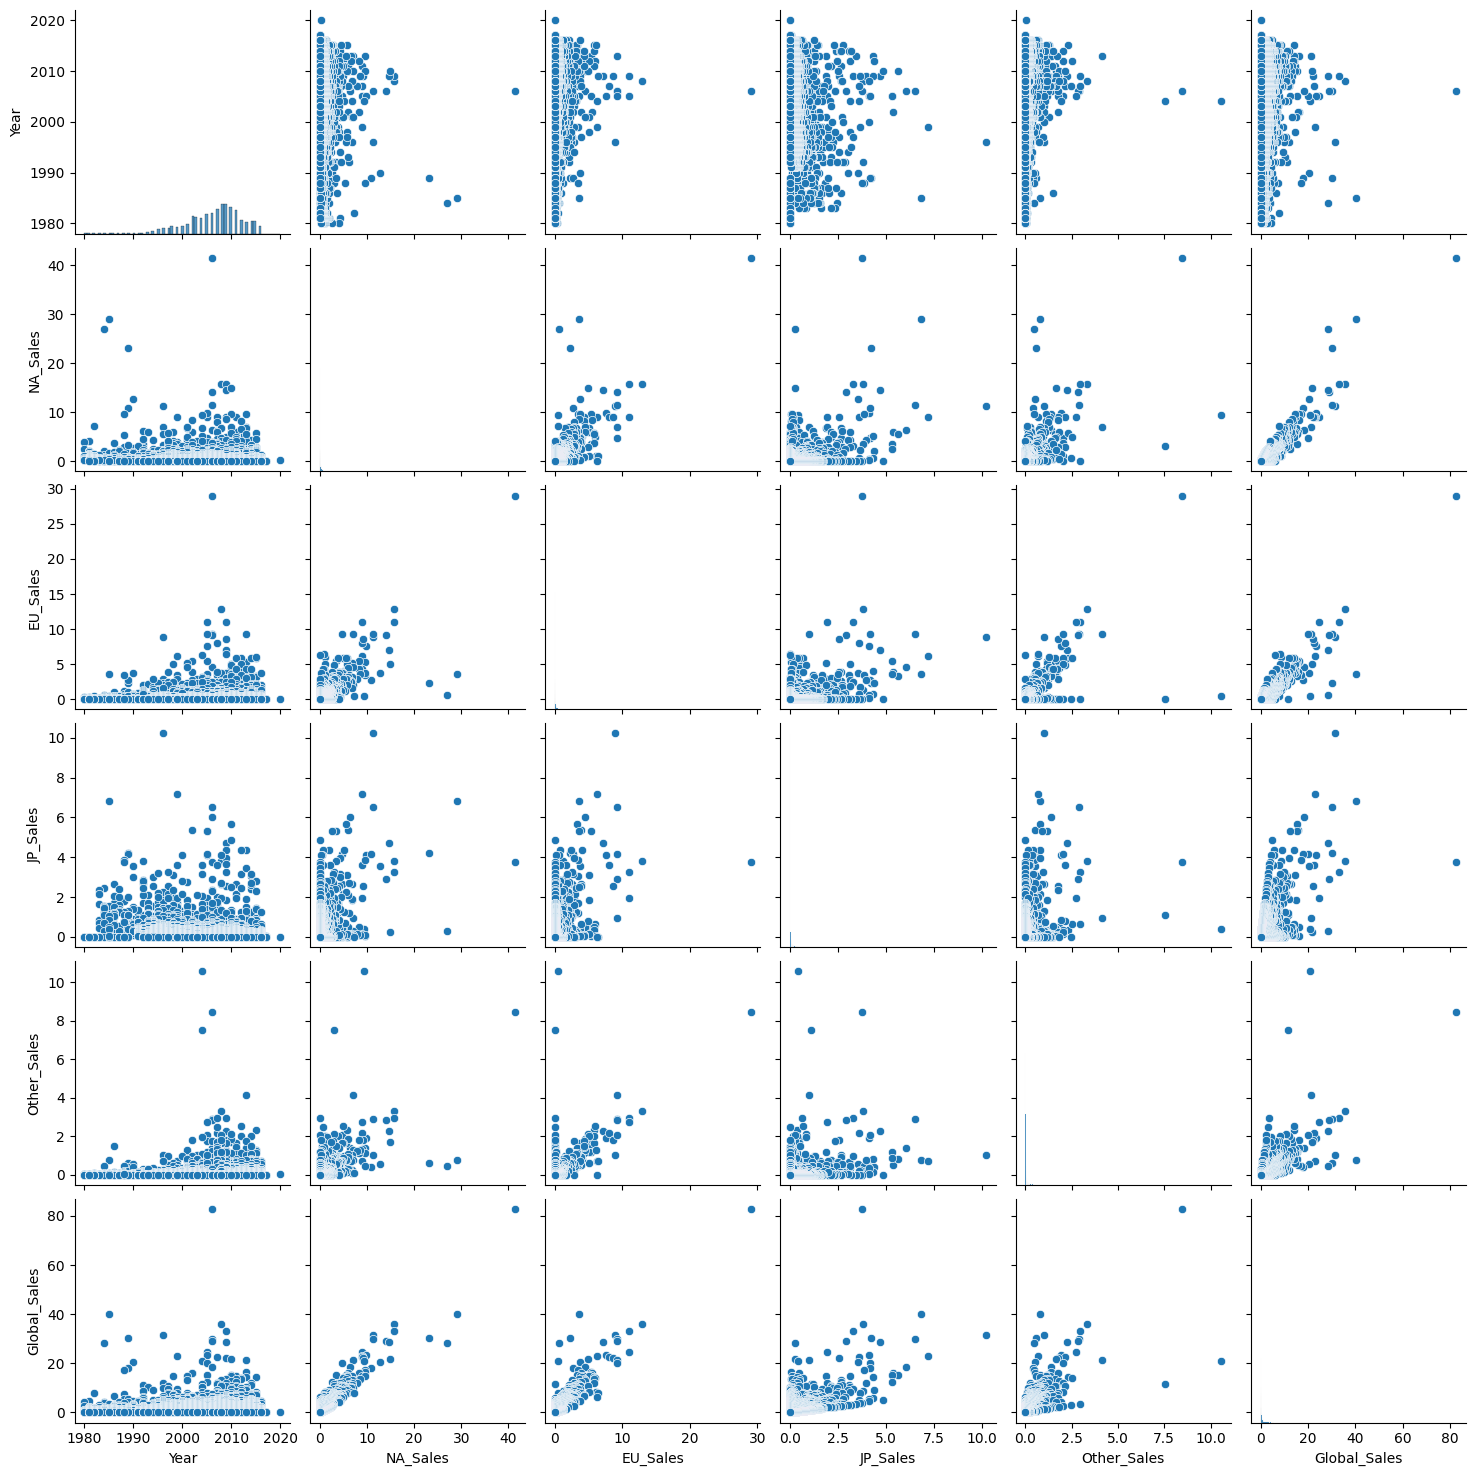

In [171]:
b = df.drop('Rank', axis=1)
sns.pairplot(b)
plt.show()

<div class="alert alert-block alert-info" style="font-size:16px;  line-height:1.6;">
This pairplot shows the associations between different features in the dataset
</div>

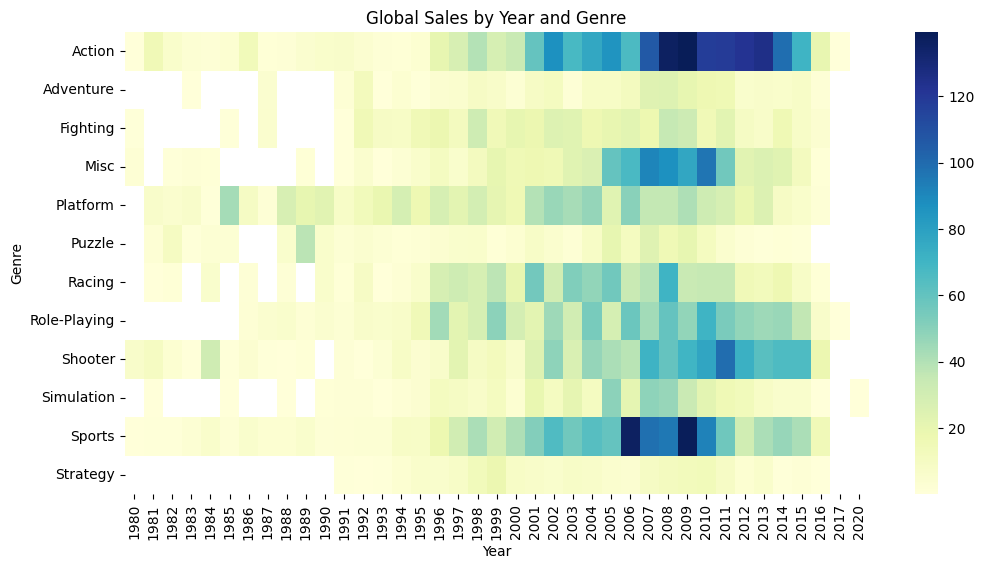

In [172]:
# title heatmap

sales_by_year_genre = df.pivot_table(index='Genre', columns='Year', values='Global_Sales', aggfunc='sum')

plt.figure(figsize=(12, 6))
sns.heatmap(sales_by_year_genre, cmap='YlGnBu')
plt.xlabel('Year')
plt.ylabel('Genre')
plt.title('Global Sales by Year and Genre')
plt.show()

<div class="alert alert-block alert-info" style="font-size:16px;  line-height:1.6;">
    This heatmap shows a quick overview of how global sales are distributed across different genres over various years, enabling the identification of trends, popular genres in specific periods, and changes in sales patterns over time as we can see in this map Action genre has the higest sales between 2007 till 2015 while adventure has a lower sales from 1980 till 2020.
</div>

## Drop Columns

<div class="alert alert-block alert-info" style="font-size:16px;  line-height:1.6;">
    Need to drop the columns which are not necessary and no needed for any prediction as Name, Platform, Gener, Publisher are consider as a categorical variable. The focus is on primarily on understanding the linear relationships between numerical variables i.i. sales variable which gives the numerical value.
</div>

In [173]:
df = df.drop(columns=['Name','Platform', 'Genre', 'Publisher'])

<div class="alert alert-block alert-info" style="font-size:16px;  line-height:1.6;">
    <h4>Correlation</h4>
Heatmaps make it simple to determine which attributes are most relevant to the target variable. In order to observe the correlation between the independent variables and the output variable, we will first plot the Pearson correlation heatmap.
</div>

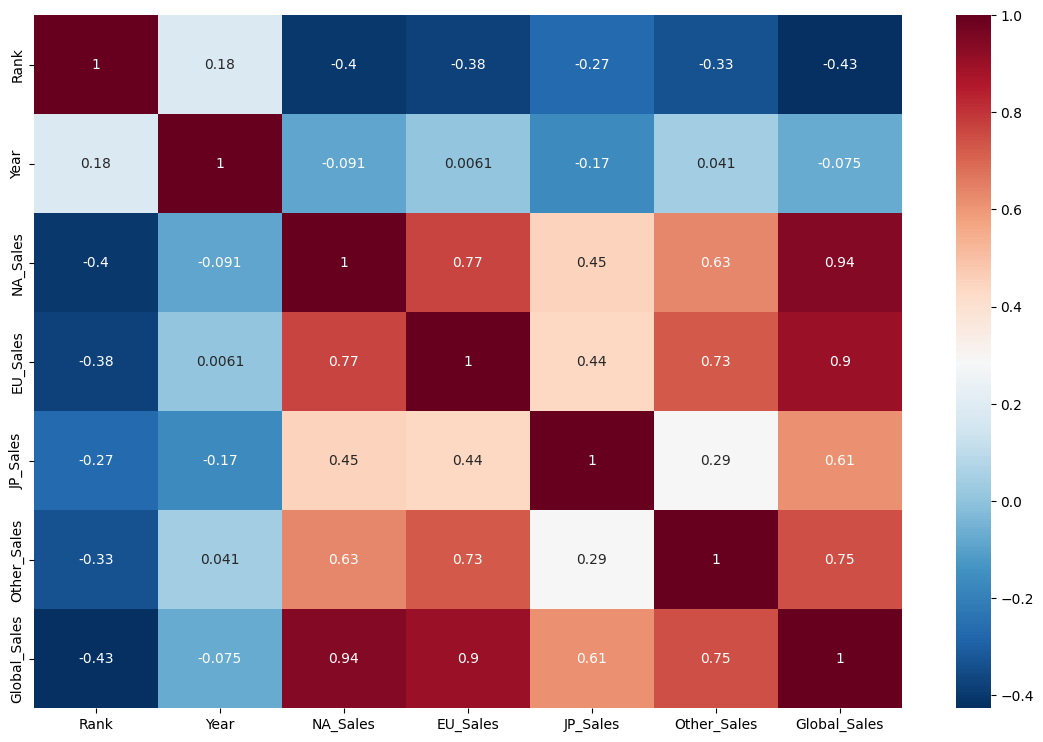

In [174]:
# Checking if there is any correlation between the variables
plt.figure(figsize=(14,9))
sns.heatmap(df.corr(),annot=True,cmap='RdBu_r');

<div class="alert alert-block alert-info" style="font-size:16px;  line-height:1.6;">
As we can see that the values generated by Year and Rand variable shows negative values that is, -0.075 for years in relation to global sales and -0.43 for rank in relation to global sales, which indicates that even though these variables have numerical values but they are not related to the global sales prediction where as the other region sales are directly related to global sales i.e. target value. Therefore, we will drop the column Rank and Year which plays any role in predicting the global sales prediction.
</div>

In [175]:
df = df.drop(columns=['Rank','Year'])

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   NA_Sales      16291 non-null  float64
 1   EU_Sales      16291 non-null  float64
 2   JP_Sales      16291 non-null  float64
 3   Other_Sales   16291 non-null  float64
 4   Global_Sales  16291 non-null  float64
dtypes: float64(5)
memory usage: 763.6 KB


<div class="alert alert-block alert-info" style="font-size:16px;  line-height:1.6;">
 Here we droped the columns  that we we won't need for the prediction.
</div>

## Feature Creation and Normalization

In [177]:
from scipy import stats

field = df['Global_Sales']
#mean value
mean = np.mean(field)

#median value
median = np.median(field)

#mode value
mode= stats.mode(field)

print("Mean: ", mean)
print("Median: ", median)
print("Mode: ", mode)

Mean:  0.5409103185808114
Median:  0.17
Mode:  ModeResult(mode=0.02, count=1045)


<div class="alert alert-block alert-info" style="font-size:16px;  line-height:1.6;">
Here we checked the mean, Mode and Median. the mean has the hightst value of 0.5409 while the Mode is 0.02 
</div>

In [178]:
# Standard deviation
np.std(df['Global_Sales'])

1.567296401432299

C:\Users\simar\AppData\Local\Temp\ipykernel_8900\2378763604.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Global_Sales'], bins=30);


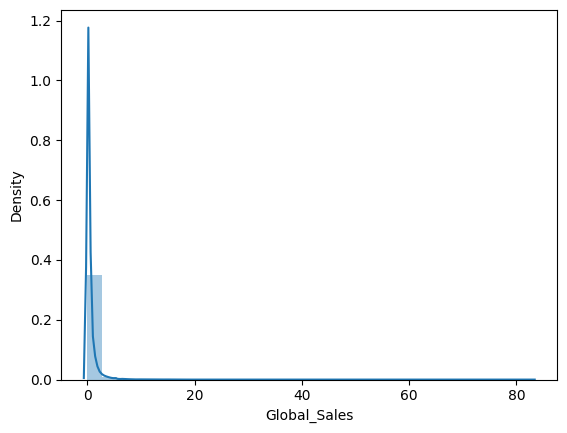

In [179]:
# Normal distribution of columns
sns.distplot(df['Global_Sales'], bins=30);
# We can see a Gaussian-like shape to the data, 
# that although is not strongly the familiar bell-shape, is a rough approximation.

<div class="alert alert-block alert-info" style="font-size:16px;  line-height:1.6;">
A Gaussian-like shape refers to a distribution that somewhat resembles a normal (bell-shaped) curve. The presence of a central tendency and symmetry in the distribution may indicate some degree of normality, even if it's not a perfect match.
Here the distribution might not be precisely normal, it demonstrates a rough approximation or similarity to a Gaussian distribution, possibly implying a certain level of symmetry and central tendency in the 'Global_Sales' data.
</div>

In [180]:
column_='Global_Sales'
# np.percentile(df[column_], 50)
q75, q25 = np.percentile(df[column_], [75,25])
iqr = q75 - q25
df[column_][df[column_]>1.5*iqr+q75]

0       82.74
1       40.24
2       35.82
3       33.00
4       31.37
        ...  
1842     1.11
1843     1.11
1844     1.11
1845     1.11
1846     1.11
Name: Global_Sales, Length: 1826, dtype: float64

mean of Global_Sales= 0.5409103185808114
median of Global_Sales= 0.17
min of Global_Sales= 0.01
max of Global_Sales= 82.74
Q25 of Global_Sales= 0.06
Q50 of Global_Sales= 0.17
Q75 of Global_Sales= 0.48
std of Global_Sales= 1.57


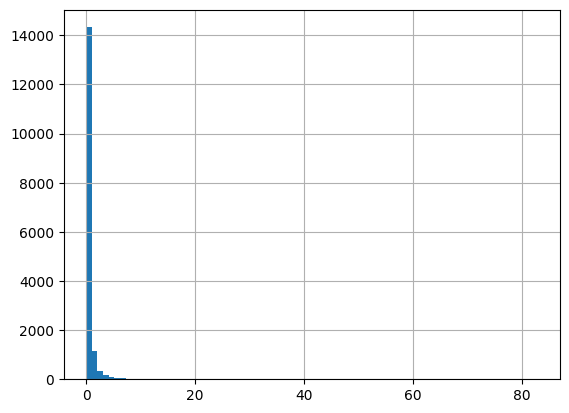

In [181]:
print('mean of Global_Sales=', np.mean(df['Global_Sales']))
print('median of Global_Sales=', np.median(df['Global_Sales']))
print('min of Global_Sales=', np.min(df['Global_Sales']))
print('max of Global_Sales=', np.max(df['Global_Sales']))
print('Q25 of Global_Sales=', np.percentile(df['Global_Sales'], 25))
print('Q50 of Global_Sales=', np.percentile(df['Global_Sales'], 50))
print('Q75 of Global_Sales=', np.percentile(df['Global_Sales'], 75))
df['Global_Sales'].hist(bins=80)
print('std of Global_Sales=', round(np.std(df['Global_Sales']),2))

<div class="alert alert-block alert-info" style="font-size:16px;  line-height:1.6;">
The average 'Global_Sales' value is approximately 0.1335.
The middle value or median of 'Global_Sales' is 0.0681, which is less than the mean, indicating a right-skewed distribution.
The smallest 'Global_Sales' value is 0.0043.
The largest 'Global_Sales' value is 1.9229.
Q1 (25th percentile)is 0.0253
Median (50th percentile)is 0.17
Q3 (75th percentile)is 0.1702
The standard deviation of 'Global_Sales' is approximately 0.17, indicating a spread or dispersion of sales values around the mean.
</div>

### Normalization and Scaling using SKlearn

In [182]:
import pandas as pd
from sklearn import preprocessing

data = df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]
cols = data.columns
dfns = pd.DataFrame(data)
dfns

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(dfns)
df_normalized = pd.DataFrame(np_scaled, columns = cols)
df_normalized

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1.000000,1.000000,0.368885,0.800378,1.000000
1,0.700892,0.123363,0.666341,0.072848,0.486281
2,0.382020,0.443832,0.370841,0.313150,0.432854
3,0.379610,0.379394,0.320939,0.280038,0.398767
4,0.271632,0.306340,1.000000,0.094607,0.379064
...,...,...,...,...,...
16286,0.000241,0.000000,0.000000,0.000000,0.000000
16287,0.000241,0.000000,0.000000,0.000000,0.000000
16288,0.000000,0.000000,0.000000,0.000000,0.000000
16289,0.000000,0.000345,0.000000,0.000000,0.000000


<Axes: >

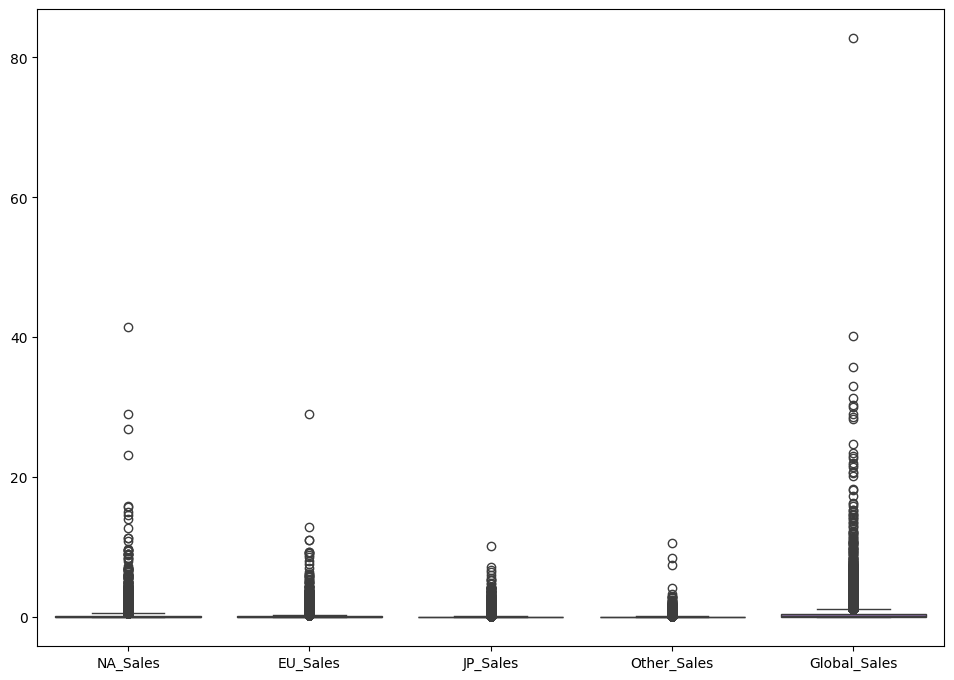

In [183]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

sns.boxplot(data=data)

<Axes: >

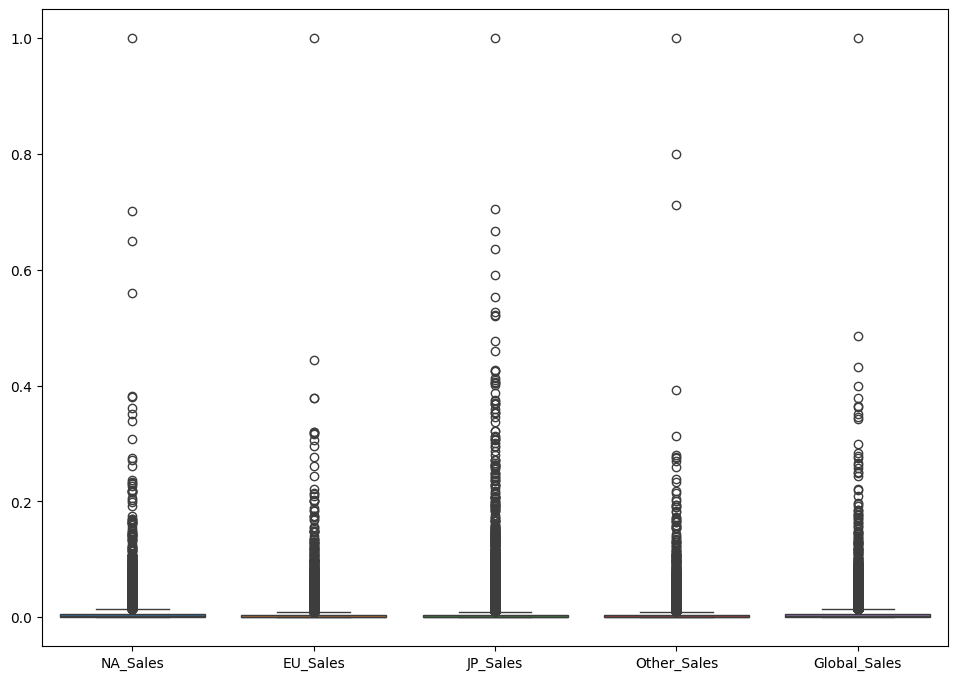

In [184]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

sns.boxplot(data=df_normalized)

### Scalling using Sklearn

<Axes: >

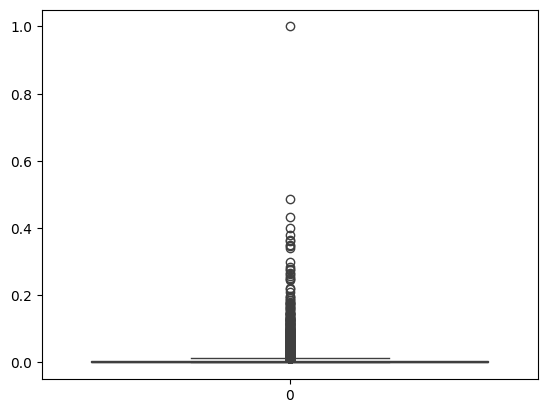

In [185]:
from sklearn.preprocessing import MinMaxScaler
from pandas import Series

series = Series(df['Global_Sales'])

# prepare data for normalization
values = series.values
values = values.reshape((len(values), 1))

# train the normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(values)
# print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))

# normalize the dataset and print
normalized = scaler.transform(values)
# print(normalized)
sns.boxplot(normalized)

## Feature Selection

### Correlation

<div class="alert alert-block alert-info" style="font-size:16px;  line-height:1.6;">
    Heatmaps make it simple to determine which attributes are most relevant to the target variable. In order to observe the correlation between the independent variables and the output variable, we will first plot the Pearson correlation heatmap.
    <hr>
This heatmap provides insights into the relationships and dependencies between different numerical variables in the dataset, enabling identification of potential correlations (positive or negative) between pairs of features.
Positive values ​​show positive correlation, while negative values ​​show inverse correlation. As we can see, sales in North America contributed considerably to overall global sales; therefore, we can see a positive correlation between the two.
</div>

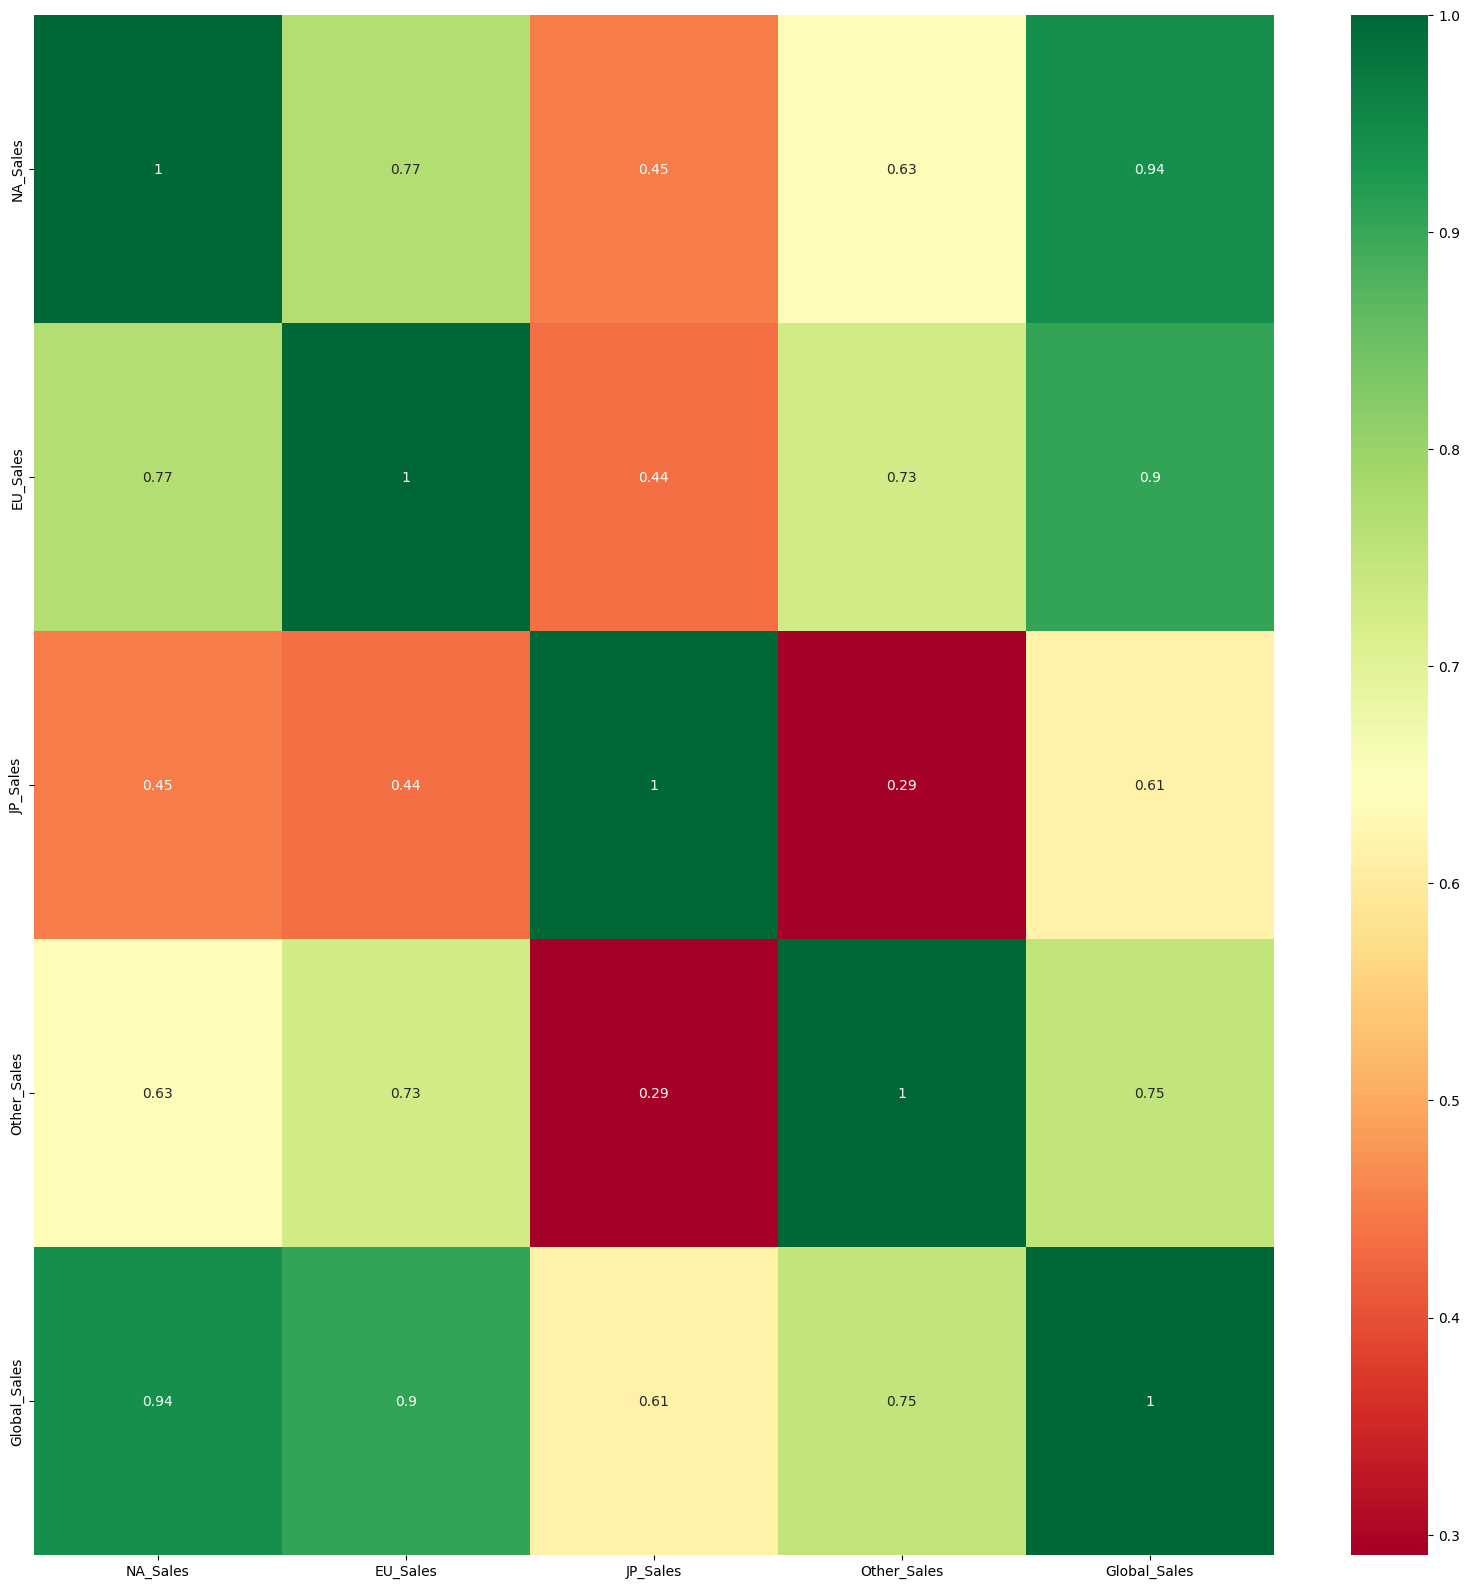

In [186]:
import seaborn as sns
from matplotlib import pyplot as plt

#get correlations of each features in dataset

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [187]:
print(corrmat)

              NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
NA_Sales      1.000000  0.768923  0.451283     0.634518      0.941269
EU_Sales      0.768923  1.000000  0.436379     0.726256      0.903264
JP_Sales      0.451283  0.436379  1.000000     0.290559      0.612774
Other_Sales   0.634518  0.726256  0.290559     1.000000      0.747964
Global_Sales  0.941269  0.903264  0.612774     0.747964      1.000000


In [188]:
#Correlation with output variable
cor_target = abs(corrmat['Global_Sales'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

NA_Sales        0.941269
EU_Sales        0.903264
JP_Sales        0.612774
Other_Sales     0.747964
Global_Sales    1.000000
Name: Global_Sales, dtype: float64

In [189]:
#Feature Selection
# Dividing into target variable and the input variables

data = df
X = data.iloc[:,0:4]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
# list(y)

In [190]:
# Pearson Correlation

def cor_selector(X, y, num_features):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in feature_name:
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_features:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

cor_support, cor_feature = cor_selector(X, y, 4)
print(str(len(cor_feature)), 'selected features')
print(cor_feature)

4 selected features
['JP_Sales', 'Other_Sales', 'EU_Sales', 'NA_Sales']


<div class="alert alert-block alert-info" style="font-size:16px;  line-height:1.6;">
Conclusion:  'JP_Sales', 'Other_Sales', 'EU_Sales', 'NA_Sales' are important variable related to target variable 'Global_Sales'. All these features will help to predict the target values.
</div>

## Linear Regression Model 

In [191]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

<div class="alert alert-block alert-info" style="font-size:16px;  line-height:1.6;">
Linear Regression analysis is a very valuable tool for managers to understand
the relationship between variables, and predict the value of one
variable based on another variable.
</div>

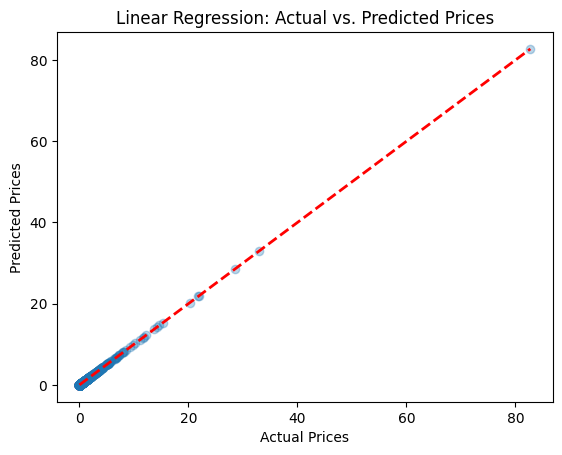

Linear Regression R-squared: 0.9999932860147335
Predicted price for new data (Linear Regression): 82.73


In [192]:
# New data for prediction
new_data = {
'NA_Sales': [41.49],
'EU_Sales': [ 29.02],
'JP_Sales': [3.77],
'Other_Sales': [8.46],
}
# Convert the new data to a DataFrame
new_data_df = pd.DataFrame(new_data)
# Prepare the data
df.dropna(subset=['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'], inplace=True)
X = df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']] # Independent variables (features)
y = df['Global_Sales'] # Dependent variable (target)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
# Predict on the test set
y_pred_linear = linear_model.predict(X_test)
# Plotting the results
plt.scatter(y_test, y_pred_linear, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--',lw=2, color='red')
plt.title('Linear Regression: Actual vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()
# Print R-squared value
r2_linear = r2_score(y_test, y_pred_linear)
print(f"Linear Regression R-squared: {r2_linear}")
# Predict on new data
predicted_price_linear = linear_model.predict(new_data_df)
print(f"Predicted price for new data (Linear Regression): {predicted_price_linear[0]:.2f}")

<div class="alert alert-block alert-info" style="font-size:16px;  line-height:1.6;">
   By using the linear regression model we will split the data for training and testing, for testing size is 0.2 i.e. 20% and remaing training is done by using linear regression function. then the prediction is done on test set.
    <hr>
Linear Regression R-squared:1.00 that means low R-squared values can be perfectly the model is 1.0.
Predicted price for new data (Linear Regression):82.73
</div>

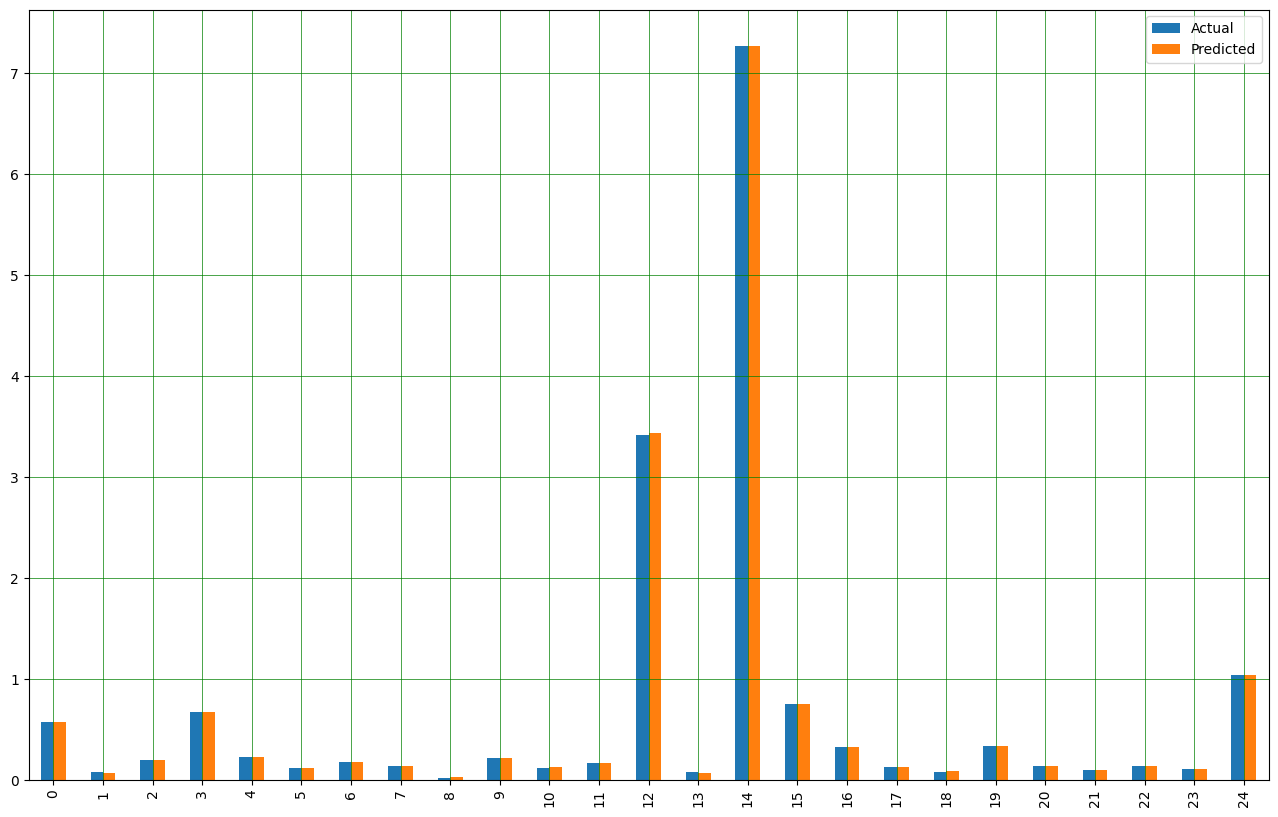

In [193]:
y_pred_random_forest = linear_model.predict(X_test)
df = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred_random_forest.flatten()})
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [194]:
### Level Of Error
from sklearn import metrics
mae_linear = metrics.mean_absolute_error(y_test, y_pred_linear)
print('Mean Absolute Error:', mae_linear)  
percentage_error_linear = (mae_linear / y.mean()) * 100
print("Percentage Error:", percentage_error_linear, "%")

Mean Absolute Error: 0.003063616816160768
Percentage Error: 0.566381655317427 %


<div class="alert alert-block alert-info" style="font-size:16px;  line-height:1.6;">
We will find the mean absolute error by passing y_test and y_prediction values as a variable for the mae function. hence the result is approximately  0.00306361 which means lower the mean absolute error (mae) better the model is. After that it has been preint in form of percentage i.e. approx 0.566%.
</div>

In [195]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_linear))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_linear)))

Mean Squared Error: 2.8722212446665027e-05
Root Mean Squared Error: 0.005359310818254995


## Random Forest

<div class="alert alert-block alert-info" style="font-size:16px;  line-height:1.6;">
Random Forest is a supervised learning algorithm that works on the concept of bagging. In bagging, a group of models is trained on different subsets of the dataset, and the final output is generated by collating the outputs of all the different models. In the case of random forest, the base model is a decision tree.
</div>

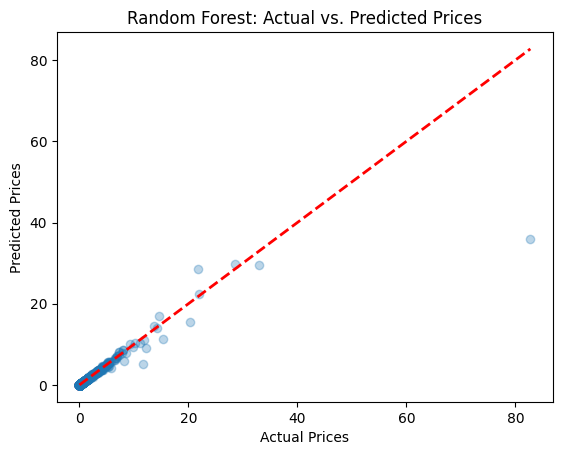

Random Forest R-squared: 0.8308379390825942
Predicted price for new data (Random Forest):36.02


In [196]:
from sklearn.ensemble import RandomForestRegressor
# Train Random Forest model
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)
# Predict on the test set
y_pred_random_forest = random_forest_model.predict(X_test)
# Plotting the results
plt.scatter(y_test, y_pred_random_forest, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', lw=2, color='red')
plt.title('Random Forest: Actual vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()
# Print R-squared value
r2_random_forest = r2_score(y_test, y_pred_random_forest)
print(f"Random Forest R-squared: {r2_random_forest}")
# Predict on new data
predicted_price_random_forest = random_forest_model.predict(new_data_df)
print(f"Predicted price for new data (Random Forest):{predicted_price_random_forest[0]:.2f}")

<div class="alert alert-block alert-info" style="font-size:16px;  line-height:1.6;">
Random Forest R-squared:0.8308
Predicted price for new data (Random Forest):36.02
</div>

In [197]:
### Level Of Error
from sklearn import metrics
mae_random_forest = metrics.mean_absolute_error(y_test, y_pred_random_forest)
print('Mean Absolute Error:', mae_random_forest)
percentage_error_random_forest  = (mae_random_forest / y.mean()) * 100
print("Percentage Error:", percentage_error_random_forest, "%")

Mean Absolute Error: 0.04068768488696353
Percentage Error: 7.522075931869071 %


In [201]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_random_forest))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_random_forest)))

Mean Squared Error: 0.7236698411897116
Root Mean Squared Error: 0.8506878635490879


## Decision tree

<div class="alert alert-block alert-info" style="font-size:16px;  line-height:1.6;">
A decision tree is a tree-like structure that represents a series of decisions and their possible consequences. It is used in machine learning for classification and regression tasks.  It helps to understand the relationships between input variables and their outcomes and identify the most significant features that contribute to the final decision.
</div>


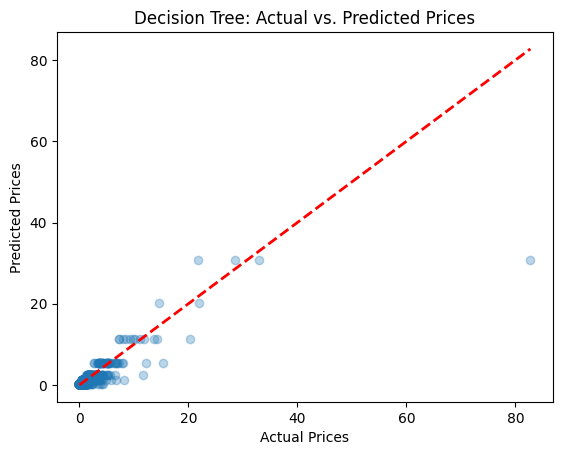

Decision Tree R-squared: 0.7217023307965275
Predicted price for new data (Decision Tree): 30.71


In [206]:
from sklearn.tree import DecisionTreeRegressor
# Train Decision Tree model
decision_tree_model = DecisionTreeRegressor(max_depth=3, max_leaf_nodes=7, random_state=42)
decision_tree_model.fit(X_train, y_train)
# Predict on the test set
y_pred_decision_tree = decision_tree_model.predict(X_test)
# Plotting the results
plt.scatter(y_test, y_pred_decision_tree, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', lw=2, color='red')
plt.title('Decision Tree: Actual vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()
# Print R-squared value
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)
print(f"Decision Tree R-squared: {r2_decision_tree}")
# Predict on new data
predicted_price_decision_tree = decision_tree_model.predict(new_data_df)
print(f"Predicted price for new data (Decision Tree): {predicted_price_decision_tree[0]:.2f}")

<div class="alert alert-block alert-info" style="font-size:16px;  line-height:1.6;">
Decision Tree R-squared: 0.72
Predicted price for new data (Decision Tree): 30.71
</div>

In [199]:
### Level Of Error
from sklearn import metrics
mae_decision_tree = metrics.mean_absolute_error(y_test, y_pred_decision_tree)
print('Mean Absolute Error:', mae_decision_tree)
percentage_error_decision_tree = (mae_decision_tree / y.mean()) * 100
print("Percentage Error:", percentage_error_decision_tree, "%")

Mean Absolute Error: 0.2815671740306655
Percentage Error: 52.05431739024954 %


In [202]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_decision_tree))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_decision_tree)))

Mean Squared Error: 1.190548453853824
Root Mean Squared Error: 1.091122565917241


In [205]:
comparing_data = {
'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
'Predicted Price': [predicted_price_linear[0],predicted_price_decision_tree[0], predicted_price_random_forest[0]],
'R-squared': [r2_linear, r2_decision_tree, r2_random_forest],
'Mean Absolute Error': [mae_linear,mae_random_forest,mae_decision_tree],
'Percentage Error': [percentage_error_linear,percentage_error_random_forest,percentage_error_decision_tree],
}
# Converting the summary data to a DataFrame
comparing_df = pd.DataFrame(comparing_data)
# Setting the model names as the index
comparing_df.set_index('Model', inplace=True)
# Displaying the summary table
comparing_df

,Predicted Price,R-squared,Mean Absolute Error,Percentage Error
Model,,,,
Linear Regression,82.728442,0.999993,0.003064,0.566382
Decision Tree,30.705000,0.721702,0.040688,7.522076
Random Forest,36.024200,0.830838,0.281567,52.054317


<div class="alert alert-block alert-info" style="font-size:16px;  line-height:1.6;">
Conclusion: By comparing all three model we can see that the most acurate model who predict the acuurate value is Linear regresssion with leas mean absolute and percentage error among the other models. <b> Which implies that the Linear regression is the Best model to implement.</b>
</div>